<a href="https://colab.research.google.com/github/kumiori/mec647/blob/main/fValues_crackPropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

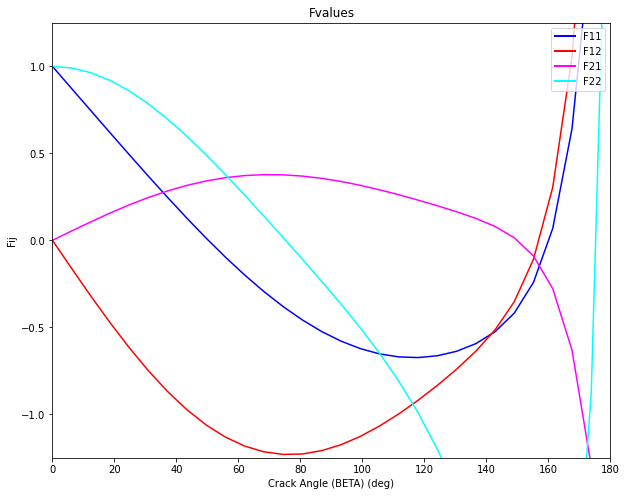

In [8]:
from math import radians
from mpmath import mp
import matplotlib.pyplot as plt
def fValues(angle):
        mp.dps = 1000  # set number of digits
        
        phi = radians(angle)/mp.pi
        f11 = 1 - 3/8*(mp.pi**2)*(phi) + \
           ((mp.pi**2)-5/128*mp.pi**4)*phi**4 + \
           ((mp.pi**2)/9 - 11/72*(mp.pi**4) + (119*mp.pi**6)/15360)*(phi**6) + \
           5.07790*(phi**8) - 2.88312*(phi**10) - 0.0925*(phi**12) + 2.996*(phi**14) - \
           4.059*(phi**16) + 1.63*(phi**18) + 4.1*(phi**20) # + O*(phi**22)
        
        f12 = -3/2*mp.pi*phi + (10*mp.pi/3 + (mp.pi**3)/16)*(phi**3) + \
           (-2*mp.pi - (133/180*mp.pi**3) + 59/1280*(mp.pi**5))*(phi**5) + \
           12.313906*(phi**7) - 7.32433*(phi**9) + \
           1.5793*(phi**11) + 4.0216*(phi**13) - 6.915*(phi**15) + \
           4.21*(phi**17) + 4.56*(phi**19) # + O*(phi**21)
           
        f21 = mp.pi/2*phi - (4/3*mp.pi + (mp.pi**3)/48)*(phi**3) + \
           (-2*mp.pi/3 + 13*(mp.pi**3)/30 - 59*(mp.pi**5)/3840)*(phi**5) - \
           6.176023*(phi**7) + (4.44112*(phi**9)) - (1.5340*phi**11) - (2.0700*phi**13) + \
           (4.684*phi**15) - (3.95*phi**17) - (1.32*phi**19) # + O*(phi**21)
           
        f22 = 1 - (4+ 3*(mp.pi**2)/8)*(phi**2) + (8/3 + 29*(mp.pi**2)/18 - \
           5*(mp.pi**4)/128)*(phi**4) + \
           (-32/15 - 4*(mp.pi**2)/9 - 1159*(mp.pi**4)/7200 + 119*(mp.pi**4)/15360)*(phi**6) + \
           10.58254*(phi**8) - 4.78511*(phi**10) - 1.8804*(phi**12) + 7.280*(phi**14) -7.591*(phi**16)+\
           0.25*(phi**18) + 12.5*(phi**20)# + O*(phi**22)
           
        return f11, f12, f21, f22
    
def showFvalues():
    f11 = []
    f12 = []
    f21 = []
    f22 = []
    import numpy as np
    beta = np.linspace(0, 180, 30)
    for i in range(len(beta)):
     # k1 = float(file.at[i,'K1'])
       # k2 = float(file.at[i,'K2'])
        f1, f2, f3, f4 = fValues(beta[i])
        f11.append(f1)
        f12.append(f2)
        f21.append(f3)
        f22.append(f4)

    fig1, ax1 = plt.subplots()
    ax1.set_title('Fvalues')
    ax1.set_xlabel('Crack Angle (BETA) (deg)')
    ax1.set_ylabel('Fij')
    ax1.set_xlim(0, 180)
    ax1.set_ylim(-1.25,1.25)
    ax1.plot(beta, f11, color = 'blue')
    ax1.plot(beta, f12, color = 'red')
    ax1.plot(beta, f21, color = 'magenta')
    ax1.plot(beta, f22, color = 'cyan')
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='b', lw=2, label='F11'),
                       Line2D([0], [0], color='r', lw=2, label='F12'),
                       Line2D([0], [0], color='magenta', lw=2, label='F21'),
                       Line2D([0], [0], color='cyan', lw=2, label='F22')]
    ax1.legend(handles = legend_elements, loc = 'upper right')
    fig1.set_figheight(8)
    fig1.set_figwidth(10)

    return
showFvalues()  